# ORIE 5355/INFO 5370 HW 1: Survey Weighting

 - Name: Ting-Wei Chiang
 - Net-id: tc695
 - Date: Sep 16th, 2021
 - Late days used for this assignment: 0
 - Total late days used (counting this assignment): 0
 - People with whom you discussed this assignment: Yujie Shao (ys993) Lu, Ting-Wei (tl574)

After you finish the homework, please complete the following (short, anonymous) post-homework survey: https://forms.gle/spVRAkxcqcDuxkuY6

We have marked questions in <font color='blue'> blue </font>. Please put answers in black (do not change colors). You'll want to write text answers in "markdown" mode instead of code. In Jupyter notebook, you can go to Cell > Cell Type > Markdown, from the menu. Please carefully read the late days policy and grading procedure [here](https://orie5355.github.io/Fall_2021/assignments/). 

# Conceptual component

### 1) Reading

<font color='blue'> Please read Sections 3 and 4 (pages 6-13) here: https://www.nber.org/system/files/working_papers/w20830/w20830.pdf, and answer the following questions.

<font color='blue'> Please summarize the sections in no more than two sentences. 

Observable reputation measures of seller quality (e.g., percent positive, feedback score, and eBay Top Rated Seller certification) are biased and highly skewed. To solve this, the authors considered the slient experiences without any feedback to be bad experiences and constructed an unobservable measure "effective percent positive," which is the number of positive feedback divided by total transactions.

<font color='blue'> Do you think it's a problem that most ratings are positive? If so, why? Answer in no more than three sentences. Please incorporate concepts discussed in class in your answer. 

Yes, it is a problem on eBay since if all ratings are similarly high, it provided no additional information on seller quality to shoppers, and therefore the construct (how likely you are to have a good transaction experience) and the measurement (seller ratings) no longer aligns. It also causes additional problems on trust: if a buyer have a single bad experience interacting with a positive-rated seller, they might later assume all sellers on the platform are bad, leading to a reputational externality across sellers and a crisis of trust on the platform.

### 2) Personal reflection

<font color='blue'> Think back to a time that you trained a model on data from people or gathered opinions via a survey (an informal one is fine). If you have not done that before, you may answer these questions about an article in the news that reported on public opinions or a model that you think might be in deployment at a company or organization with which you interact (for example, Amazon, google maps, etc)

<font color='blue'> Briefly summarize the scenario in no more than two sentences. 

I gathered people's opinions on street performers in NYC via a Google Forms survey for a user research study.

<font color='blue'> What was the construct that you cared about/wanted to measure? What was the measurement (numerical data)? In what ways did the measurement not match the construct you cared about? Answer in no more than 4 sentences.  

The construct was "how much money people usually donate to street performers." The measurement was in different ranges of dollars: never, less than \$1, \$1-\$10, \$10-\$20, or more than \$20. Instead of recalling on every experience they have interacted with street performers, people tend to only remember the few times when they actually dontated to street performers, and answer the survey question based on the highest number of donation they have given.




<font color='blue'> What selection biases/differential non-response issues occurred and how did it affect your measurement? (If your answer is "None," explain exactly why you believe the assumptions discussed in class were met). Answer in no more than 3 sentences. 

We conducted the survey with people who were sitting at Times Square, near where the street performers gathered. Those who were at the spot and responded us in person have a higher tendency to have engaged with street performers or be interested in this topic. This leads to an over-estimate of our measurement.


<font color='blue'> Given what we have learned in class so far, what would you do differently if faced with the same scenario again? Answer in no more than 3 sentences. 

I would perform stratified sampling to control the demographics of the respondents and their familiarity with street performers. I would also move the sampling process online, or sample in multiple locations in NYC to reduce the variance of the population sampled.

# Programming component

<font color='blue'> In this part of the homework, we provide you with data from a poll in Florida before the 2016 Presidential election in the United States. We also provide you with (one pollster's) estimates of who will vote in the 2016 election, made before the election. You will use this data and apply the weighting techniques covered in class.

## Preliminaries to load packages and data

In [1]:
import pandas as pd
import numpy as np

In [2]:
dfpoll = pd.read_csv('polling_data_hw1.csv') # raw polling data
dfpoll.head()

,candidate,age,gender,party,race,education
0,Someone else,30-44,Male,Independent,White,College
1,Hillary Clinton,45-64,Male,Republican,Hispanic,College
2,Hillary Clinton,30-44,Male,Independent,Hispanic,College
3,Hillary Clinton,65+,Female,Democrat,White,College
4,Donald Trump,65+,Female,Republican,White,High School


In [3]:
dfdemographic = pd.read_csv('florida_proportions_hw1.csv') # proportions of population
dfdemographic.head()

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2
0,0.387927,party,NaN,Democrat,NaN
1,0.398788,party,NaN,Republican,NaN
2,0.213285,party,NaN,Independent,NaN
3,0.445928,gender,NaN,Male,NaN
4,0.554072,gender,NaN,Female,NaN


dfdemographic contains estimates of likely voters in Florida in 2016. When Demographic_Type_2 is NaN, the row refers to just the marginal population percentage of the group in Demographic_1 of type Demographic_Type_1. When it is not NaN, the row has the joint distribution of the corresponding demographic groups.

## Part A: Raw visualization

<font color='blue'> Here, we'll visualize whether the respondents in the poll match the likely voter estimates. Create a scatter-plot where each point represents one Demographic group (for example, party-Independent), where the X axis is the Electoral_Proportion in dfdemographic, and the Y axis is the proportion in dfpoll. 

In [4]:
# Replace "Refused" with NaNs, so that they are not included when calculating demographic proportions
dfpoll = dfpoll.replace('Refused', np.nan)

# Calculate proportion of each demographic group in poll data
dfdemographic['Poll_Proportion'] = dfdemographic.apply(lambda row: 
                    dfpoll[row['Demographic_Type_1']].value_counts(normalize = True)[row['Demographic_1']] if type(row['Demographic_Type_2']) == float
                    else dfpoll.value_counts([row['Demographic_Type_1'], row['Demographic_Type_2']], normalize=True)[(row['Demographic_1'], row['Demographic_2'])], 
                    axis=1)

Text(0.5, 1.0, 'Proportion of polls v.s. voter estimates')

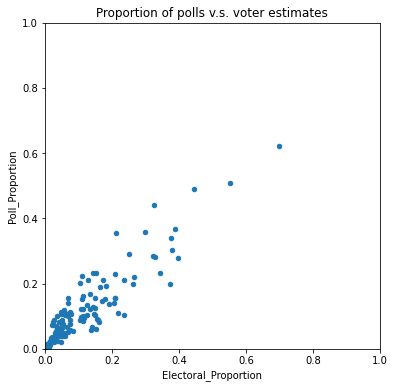

In [5]:
# Scatter Plot: Comparing demographic proportion for polls v.s. voter estimates (electoral)

# 1. Demographic_Type_1 + Demographic_Type_2
ax = dfdemographic.plot.scatter('Electoral_Proportion', 'Poll_Proportion', figsize=(6, 6))
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title("Proportion of polls v.s. voter estimates")

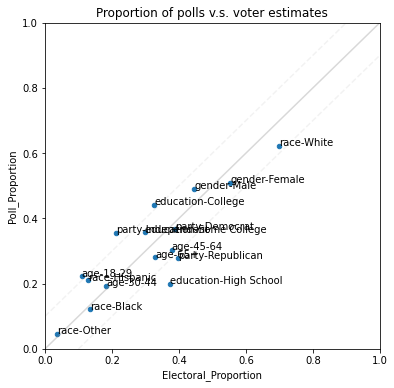

In [6]:
# 2. Demographic_Type_1 only

dfdemographic_type1 = dfdemographic[dfdemographic['Demographic_Type_2'].isna()]

ax = dfdemographic_type1.plot.scatter('Electoral_Proportion', 'Poll_Proportion', figsize=(6, 6))
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title("Proportion of polls v.s. voter estimates")
for idx, row in dfdemographic_type1.iterrows():
    # Add text annotations to each data point
    ax.text(row['Electoral_Proportion'], row['Poll_Proportion'], str(row['Demographic_Type_1'] + '-' + row['Demographic_1']))  

# Add lines to help understand which demographic groups are over-represented or under-represented
ax.plot((0.0, 1.0), (0.0, 1.0), linestyle='-', color='gray', alpha=0.3)
ax.plot((0.0, 0.9), (0.1, 1.0), linestyle='--', color='gray', alpha=0.1)
ax.plot((0.1, 1.0), (0.0, 0.9), linestyle='--', color='gray', alpha=0.1)

<font color='blue'>Which group is most over-represented? Most under-represented?</font>

From the above graph and the below tables, we can see that demographic group "party-Independent" is the most over-represented, with 35.6% in polls but 21.3% in voter estimates. Groups "education-College" and "age-18-29" are also over-represented, with the proportion difference above 10%. 

Group "education-High School" is the most under-represented, with only 20% in polls but 37.4% in voter estimates. Group "party-Republican" is also under-represented by around 11%.

In [7]:
# Calculate the differences between poll proportion and electoral proportion
dfdemographic['Proportion_Diff'] = dfdemographic['Poll_Proportion'] - dfdemographic['Electoral_Proportion']
dfdemographic_type1 = dfdemographic[dfdemographic['Demographic_Type_2'].isna()]

In [8]:
# Over-represented groups
dfdemographic_type1[dfdemographic_type1['Proportion_Diff'] > 0.1].sort_values('Proportion_Diff', ascending=False)

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2,Poll_Proportion,Proportion_Diff
2,0.213285,party,NaN,Independent,NaN,0.355713,0.142428
15,0.327006,education,NaN,College,NaN,0.442105,0.115099
5,0.109728,age,NaN,18-29,NaN,0.222607,0.112879


In [9]:
# Under-represented groups
dfdemographic_type1[dfdemographic_type1['Proportion_Diff'] < -0.1].sort_values('Proportion_Diff')

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2,Poll_Proportion,Proportion_Diff
13,0.374316,education,NaN,High School,NaN,0.200000,-0.174316
1,0.398788,party,NaN,Republican,NaN,0.277974,-0.120814


## Part B: Weighting

### 1) Raw average

<font color='blue'> For now, we'll ignore people who answered anything but "Hillary Clinton" or "Donald Trump." Below, report the "raw polling average," the percentage of people "Hillary Clinton" divided by the number who answered either Hillary or Trump.

Raw polling average = 0.545833

In [10]:
# Create a list to store each poll estimate from different methods for Part C(2)
all_estimates_list = []

In [11]:
# Ignore people who answered anything but "Hillary Clinton" or "Donald Trump
dfpoll = dfpoll[dfpoll.candidate.isin(['Hillary Clinton', 'Donald Trump'])]

# Compute raw polling average
raw_average = dfpoll['candidate'].value_counts(normalize = True)["Hillary Clinton"]
all_estimates_list.append(raw_average)
raw_average

0.5458333333333333

### 2) Single dimensional marginal weighting (on just 1 demographic type)

<font color='blue'> For each demographic type separately -- age, gender, party, race, and education -- weight the poll by just that demographic type, in accordance to the population proportions given. Report the resulting poll results, and briefly (at most 3 sentences) describe what you observe.

<font color='blue'> You'll notice that some of the groups in the polling data ("refused") do not show up in the population percentages. For now, we'll ignore those respondents.

The polling result weighted by "party" is lower than the raw polling average by almost 5% and leaning towards Trump. Since Republicans are under-represented in this poll, we can see that the raw average over-estimates the percentage of people supporting Hillary Clinton.

In [12]:
# Create a binary column indicating if the person voted for Hillary
dfpoll['voted_for_hillary'] = (dfpoll['candidate'] == "Hillary Clinton").astype(int)

In [13]:
def get_weighted_average(proportion_var, candidate_var, group1, group2=None):
    dfdemographic_type1 = dfdemographic[dfdemographic['Demographic_Type_2'].isna()]
    dfdemographic_type2 = dfdemographic[dfdemographic['Demographic_Type_2'].notna()]
    if group2 is None:
        mean = dfpoll.groupby(group1).mean()[candidate_var]
        weight = dfdemographic_type1[dfdemographic_type1['Demographic_Type_1'] == group1].set_index('Demographic_1')[proportion_var]
    else:
        mean = dfpoll.groupby([group1, group2]).mean()[candidate_var]
        weight = dfdemographic_type2[((dfdemographic_type2['Demographic_Type_1'] == group1)&(dfdemographic_type2['Demographic_Type_2'] == group2))].set_index(['Demographic_1', 'Demographic_2'])[proportion_var]
        weight.index.names = [group1, group2]
    df = mean.to_frame().join(weight)
    return (df[candidate_var] * df[proportion_var]).sum()

In [14]:
for type1 in ['age', 'gender', 'party', 'race', 'education']:
    weighted_average = get_weighted_average('Electoral_Proportion', 'voted_for_hillary', type1)
    all_estimates_list.append(weighted_average)
    print(f"""Weighted polling average by {type1}: {weighted_average:.6f}
          - difference from raw average: {weighted_average - raw_average:.4f}""")

Weighted polling average by age: 0.530542
          - difference from raw average: -0.0153
Weighted polling average by gender: 0.549823
          - difference from raw average: 0.0040
Weighted polling average by party: 0.498720
          - difference from raw average: -0.0471
Weighted polling average by race: 0.530486
          - difference from raw average: -0.0153
Weighted polling average by education: 0.544059
          - difference from raw average: -0.0018


### 2-dimensional joint distribution weighting

<font color='blue'>Now, for each pair of demographic types in dfdemographic, do the same -- weight the poll by that pair of demographic types, in accordance to the given joint distributions, and briefly (at most 3 sentences) describe what you observe

In all pairs of the demographic groups except for (gender, education), the weighted polling average are lower than the raw average, indicating that the polls have biased towards Clinton. The polling average weighted by (party, age) and (party, education) have flipped to Trump-leaning.

In [15]:
# get all combinations for Type 1 and Type 2 demographics
dfdemographic_types = dfdemographic[['Demographic_Type_1', 'Demographic_Type_2']].dropna().drop_duplicates()

for (type1, type2) in zip(dfdemographic_types['Demographic_Type_1'], dfdemographic_types['Demographic_Type_2']):
    weighted_average = get_weighted_average('Electoral_Proportion', 'voted_for_hillary', type1, type2)
    all_estimates_list.append(weighted_average)
    print(f"""Weighted polling average by ({type1}, {type2}): {weighted_average:.6f}
          - difference from raw average: {weighted_average - raw_average:.4f}""")

Weighted polling average by (party, gender): 0.502921
          - difference from raw average: -0.0429
Weighted polling average by (party, age): 0.497992
          - difference from raw average: -0.0478
Weighted polling average by (party, race): 0.501144
          - difference from raw average: -0.0447
Weighted polling average by (party, education): 0.493501
          - difference from raw average: -0.0523
Weighted polling average by (gender, age): 0.533289
          - difference from raw average: -0.0125
Weighted polling average by (gender, race): 0.534816
          - difference from raw average: -0.0110
Weighted polling average by (gender, education): 0.547578
          - difference from raw average: 0.0017
Weighted polling average by (age, race): 0.524516
          - difference from raw average: -0.0213
Weighted polling average by (age, education): 0.525483
          - difference from raw average: -0.0204
Weighted polling average by (race, education): 0.514272
          - difference

### 3) 2-dimensional marginal 

<font color='blue'> We don't always have access to joint distributions across the population -- for example, it may be hard to estimate from past exit polls (surveys done as people are leaving the polling station) what the joint distribution of education and gender is, for example. However, access to marginal distributions are often available. 

<font color='blue'> As discussed in class, one strategy when you don't have access to joint distributions -- only marginals -- is to _multiply_ the marginal distributions. For example, if 50% of your population is Democratic and 50% is a woman, then pretend that 50% times 50% = 25% of your population is a Democratic women. Clearly this technique is not perfect, but it is sometimes a useful heuristic.   

<font color='blue'> For the following pairs of Demographic types, report the weighting results if you use the joint distributions in dfdemographic versus if you approximate the joint distribution using the marginals. Briefly (at most 3 sentences) describe what you observe.

<font color='blue'> (party, gender)

<font color='blue'> (race, gender)

The polling results using 2-dimensional marginal weighting are not so different from that from 2-dimensional joint distribution weighting. This indicates that 2-dimensional marginal approach is a good proxy to estimate joint distributions across the population when this piece of data is unavailable.

In [16]:
# Calculate 2-dim marginal joint proportion
dfdemographic_type1_dict = {(type1, group1):proportion for (type1, group1, proportion) in zip(dfdemographic_type1['Demographic_Type_1'], dfdemographic_type1['Demographic_1'], dfdemographic_type1['Electoral_Proportion'])}
dfdemographic['Marginal_Joint_Proportion'] = dfdemographic.apply(lambda row: 
                          dfdemographic_type1_dict[(row['Demographic_Type_1'],row['Demographic_1'])] * dfdemographic_type1_dict[(row['Demographic_Type_2'],row['Demographic_2'])]
                          if type(row['Demographic_Type_2']) == str
                          else np.nan , axis=1)

In [17]:
for (type1, type2) in [('party', 'gender'), ('gender', 'race')]:
    weighted_average_joint = get_weighted_average('Electoral_Proportion', 'voted_for_hillary', type1, type2)
    weighted_average_marginal = get_weighted_average('Marginal_Joint_Proportion', 'voted_for_hillary', type1, type2)
    all_estimates_list.append(weighted_average_marginal)
    print(f"""Weighted polling average by ({type1}, {type2}): {weighted_average_marginal:.6f}
    - difference from raw average: {weighted_average_marginal - raw_average:.4f}
    - difference from joint distribution weighting: {weighted_average_marginal - weighted_average_joint:.6f}""")

Weighted polling average by (party, gender): 0.503802
    - difference from raw average: -0.0420
    - difference from joint distribution weighting: 0.000881
Weighted polling average by (gender, race): 0.534844
    - difference from raw average: -0.0110
    - difference from joint distribution weighting: 0.000029


### 4) Bonus points (up to 6 points): Implement a "cheap" version of the MRP technique mentioned in class.

<font color='blue'> The above techniques use the mean answer among people who share a demographic as the estimate for that demographic. But that wastes information _across_ demographics. For example, maybe people who only have "Some College" are similar enough to people who have "High School" as to provide some useful information. 

<font color='blue'>  First, do the following: use a logistic regression (or your favorite prediction tool) to predict candidate choice, using the demographics. You might want to convert some demographics (like education) to ordered numeric (e.g., 1, 2, 3) as opposed to using discrete categories. 

<font color='blue'>  Here, you will earn partial bonus points by just reporting the predictions and comparing them to the means of each covariate group in the raw polling data. Give a scatter-plot, where each point is one combination of full demographics (age, gender, party, race/ethnicity, education), the X axis is the raw polling average for that combination, and the Y axis is your regression prediction for that combination.   

<font color='blue'>  Then, once you have predictions for each set of covariates, "post-stratify" to get a single population estimate by plugging them into the above weighting techniques, where you use the predictions instead of the raw averages in that cell. Report the resulting estimates if you do the 2-dimensional joint weighting (on every pair).



In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
# Data pre-processing before logistic regression
### Binary variable: gender
### Ordinal variables: age, education (assume NAs are High School)
### Categorical variables: race, party (one-hot encoding)
dfpoll_encoded = dfpoll.drop(columns=['candidate'])
gender_map = {'Male': 0, 'Female': 1}
age_map = {'18-29': 0,  '30-44': 1,  '45-64':2,  '65+': 3}
education_map = {np.nan: 0, 'High School': 0,  'Some College': 1,  'College':2}
dfpoll_encoded.gender = dfpoll_encoded.gender.map(gender_map)
dfpoll_encoded.age = dfpoll_encoded.age.map(age_map)
dfpoll_encoded.education = dfpoll_encoded.education.map(education_map)
dfpoll_encoded = pd.get_dummies(dfpoll_encoded)

In [20]:
# logistic regression model
X = dfpoll_encoded.drop(columns=['voted_for_hillary'])
y = dfpoll_encoded['voted_for_hillary'].values
clf = LogisticRegression(random_state=0).fit(X, y)

# prediction on the training set
dfpoll['lr_predict_vote_for_hillary'] = clf.predict(X)
print(f"Prediction accuarcy: {clf.score(X, y):4f}")

Prediction accuarcy: 0.856944


In [21]:
# Reporting the predictions
dfpoll['lr_predict_vote_for_hillary']

1      0
2      1
3      1
4      0
5      1
      ..
861    0
862    1
863    0
864    1
866    1
Name: lr_predict_vote_for_hillary, Length: 720, dtype: int64

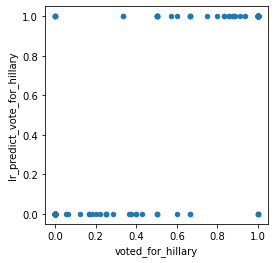

In [22]:
# Scatter plot: comparing predictions to the means of each covariate group in the raw polling data
ax = dfpoll.groupby(['age', 'gender', 'party', 'race', 'education']).mean().plot.scatter('voted_for_hillary', 'lr_predict_vote_for_hillary', figsize=(4,4))

In [23]:
for (type1, type2) in zip(dfdemographic_types['Demographic_Type_1'], dfdemographic_types['Demographic_Type_2']):
    weighted_average = get_weighted_average('Electoral_Proportion', 'lr_predict_vote_for_hillary', type1, type2)
    all_estimates_list.append(weighted_average)
    print(f"""Weighted polling average by ({type1}, {type2}): {weighted_average:.6f}
          - difference from raw average: {weighted_average - raw_average:.4f}""")

Weighted polling average by (party, gender): 0.485131
          - difference from raw average: -0.0607
Weighted polling average by (party, age): 0.475375
          - difference from raw average: -0.0705
Weighted polling average by (party, race): 0.486735
          - difference from raw average: -0.0591
Weighted polling average by (party, education): 0.475586
          - difference from raw average: -0.0702
Weighted polling average by (gender, age): 0.515977
          - difference from raw average: -0.0299
Weighted polling average by (gender, race): 0.507626
          - difference from raw average: -0.0382
Weighted polling average by (gender, education): 0.531166
          - difference from raw average: -0.0147
Weighted polling average by (age, race): 0.499190
          - difference from raw average: -0.0466
Weighted polling average by (age, education): 0.510037
          - difference from raw average: -0.0358
Weighted polling average by (race, education): 0.490351
          - differenc

### 5) Bonus points (up to 3 points): Implement full "raking" using all the demographic covariates, i.e., match all the marginals without assuming independence, as opposed to just one or two marginal distributions.

<font color='blue'> You may use existing python packages, such as [here](https://quantipy.readthedocs.io/en/staging-develop/sites/lib_doc/weights/01_background.html#the-statistical-problem). Another approach would be to use [rpy2](https://rpy2.github.io/doc/latest/html/introduction.html) to call `R`, as there are many well-maintained packages in `R` to analyze polling data. One example is [here](https://www.rdocumentation.org/packages/survey/versions/4.1-1/topics/rake). 

## Part C: Uncertainty analysis and choices

### 1) Education weighting analysis and "refused" answers

<font color='blue'> i. In Part B, you should notice a discrepancy from what we said in class and the data -- weighting by education does _not_ seem to help much in reducing the polling average from being pro-Clinton. Dig into the data to see why the methods we tried above might not be perfect, and what data you would want (such as demographic joint distribution) to do better. Discuss in 5 sentences or less. Especially convincing would be plots/calculations on what would happen under hypothetical data. 

<font color='blue'> Hint: Look at polling average broken up by just education, and then broken up by education and other covariates. Especially helpful may be the following pandas command:

<font color='blue'> `dfpoll.groupby(['education', ...])['candidate'].value_counts(normalize = True)`

<font color='blue'> where ... is replaced by other columns

There are 5 people in this poll that refused to answer their education level, and 3 out of the 5 also refused to answer their race. The polling results for people who refused to answer "education" showed that they are more Trump-leaning, so ignoring this population could lead to a bias towards Clinton when we perform weighting by education.

It would be helpful to collect data of response rate (e.g., rate of picking up the phone for a poll) and refusal rate (e.g., rate of answering "Refused" after picking up the phone) for different education levels, in order to estimate the true distribution of the education demographics. It would also be helpful to collect a more granular education data other than just 3 levels: "High School," "College," and "Some College."

In [24]:
refused_average = dfpoll.fillna('Refused').groupby('education')['candidate'].value_counts(normalize=True)['Refused']['Hillary Clinton']
n = dfpoll.fillna('Refused').groupby('education').count().iloc[:, 0]['Refused']
print(f"Polling average for Group \"education-Refused\" (N={n}): {refused_average:.2f}")

Polling average for Group "education-Refused" (N=5): 0.40


In [25]:
refused_average = dfpoll.fillna('Refused').groupby(['education', 'race'])['candidate'].value_counts(normalize=True)[('Refused', 'Refused')]['Hillary Clinton']
n = dfpoll.fillna('Refused').groupby(['education', 'race']).count().iloc[:, 0][('Refused', 'Refused')]
print(f"Polling average for Group \"(education-Refused, race-Refused)\" (N={n}): {refused_average:.2f}")

Polling average for Group "(education-Refused, race-Refused)" (N=3): 0.33


<font color='blue'> ii. You'll notice that there are many responses with "refused," and that those people in particular are Trump-leaning. The weighting techniques we used above would ignore these people. How would you adjust your procedures/estimates above to take them into account? Especially convincing would be plots/calculations on what would happen under hypothetical data. Answer in at most 3 sentences.

From the scatter plot, we know that the poll under-represents the groups "White," "High School," and "Republican." Suppose that they still participated in the poll but chose to answer "Refused." If we plug in this assumption for single-dimensional marginal weighting and 2-dimensional joint distribution weighting, we could slightly pull down the polling average for voting Clinton further more.

In [26]:
dfdemographic_type1 = dfdemographic[dfdemographic['Demographic_Type_2'].isna()]
mean = dfpoll.fillna({'education': 'High School'}).groupby('education').mean().loc[:, 'voted_for_hillary']
weight = dfdemographic_type1[dfdemographic_type1['Demographic_Type_1'] == 'education'].set_index('Demographic_1')['Electoral_Proportion']
df = mean.to_frame().join(weight)
weighted_average = (df['voted_for_hillary'] * df['Electoral_Proportion']).sum()
print(f"""If assuming all \"education-Refused\" are \"education-High School\",
Weighted polling average by education: {weighted_average:.6f}
      - difference from raw average: {weighted_average - raw_average:.4f}
      - difference from ignoring \"Refused\" in single-dim marginal weighting: {weighted_average - get_weighted_average('Electoral_Proportion', 'voted_for_hillary', 'education'):.4f}""")

If assuming all "education-Refused" are "education-High School",
Weighted polling average by education: 0.542395
      - difference from raw average: -0.0034
      - difference from ignoring "Refused" in single-dim marginal weighting: -0.0017


In [27]:
dfdemographic_type2 = dfdemographic[dfdemographic['Demographic_Type_2'].notna()]
mean = dfpoll.fillna({'education':'High School', 'race': 'White'}).groupby(['race', 'education']).mean().loc[:, 'voted_for_hillary']
weight = dfdemographic_type2[((dfdemographic_type2['Demographic_Type_1'] == 'race')&(dfdemographic_type2['Demographic_Type_2'] == 'education'))].set_index(['Demographic_1', 'Demographic_2'])['Electoral_Proportion']
weight.index.names = ['race', 'education']
df = mean.to_frame().join(weight)
weighted_average = (df['voted_for_hillary'] * df['Electoral_Proportion']).sum()
print(f"""If assuming all \"education-Refused\" are \"education-High School\" and all \"race-Refused\" are \"race-White\",
Weighted polling average by (race, education): {weighted_average:.6f}
      - difference from raw average: {weighted_average - raw_average:.4f}
      - difference from ignoring \"Refused\" in 2-dim joint distribution weighting: {weighted_average - get_weighted_average('Electoral_Proportion', 'voted_for_hillary', 'race', 'education'):.4f}""")

If assuming all "education-Refused" are "education-High School" and all "race-Refused" are "race-White",
Weighted polling average by (race, education): 0.513139
      - difference from raw average: -0.0327
      - difference from ignoring "Refused" in 2-dim joint distribution weighting: -0.0011


<font color='blue'> None of the above techniques deal with selection biases/non-response on _un-measured_ covariates. Do you think that may be an important concern in this dataset? Why or why not? Respond in 3 or fewer sentences.

Yes, there are still problems with non-repsonse on un-measured covariates such as social trust, civic engagement, and lifestyles. Response rate can also vary due to how this poll is conducted, e.g., at what time in the day, when in the election, and technology/channel used. Though most of our weighted polling results were above 0.5 (suggesting Clinton winning), that is not the case in reality: Clinton, with 47.8% of the vote, lost 1.2% to Trump in the 2016 presidential election in Florida. 

### 2) Final estimates

<font color='blue'> Throughout this homework, you made many estimates of the same quantity -- the fraction of people who will vote for Clinton in Florida. Below, plot a histogram of all your estimates.

Text(0.5, 1.0, 'Histogram of all polling average estimates')

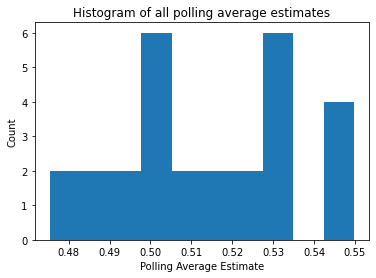

In [28]:
import matplotlib.pyplot as plt

plt.hist(all_estimates_list)
plt.xlabel('Polling Average Estimate')
plt.ylabel('Count')
plt.title("Histogram of all polling average estimates")

<font color='blue'> Given all your above analysis, if you were a pollster what would you report as your single estimate? 

In [29]:
# Averaging the polling results weighted by the joint distribution of
# (party, gender), (party, age), (party, race), (party, education)

np.mean(all_estimates_list[6:10])

0.4988897502828247

<font color='blue'> Justify your choice, in at most 3 sentences

Since I hold the joint distribution of two demographics in my voter estimates data, I consider the results from 2-dimensional joint distribution weighting more trust-worthy than the raw average, the single dimensional marginal weighting, and the 2-dimensional marginal weighting. 

With only 720 data points and a 85.7% prediction accuracy on the training set for my logistic regression model, I neglected the MRP results too. 

Finally, among all 10 pairs of demographics, I considered only the 4 demographic pairs that includes "party" since I consider partisanship a more important factor that influences candidate choice than other demographic types such as gender or age.

<font color='blue'> Though we did not discuss how to calculate margin of error or standard errors with weighting in this course, what would you say if someone asked you how confident you are in your estimate? You may either qualitatively answer, or try to come up with a margin of error.  

First, I can report the sample size of my poll, which is 720 people in this case.

Next, the histogram provided us with a qualitative measurement of margin of error: I could try $n$ common weighting techniques and report the mean and standard deviation of all my estimates.




